In [ ]:
#Individual Analysis of Three Technology Companies' stock (Apple, Microsoft and IBM)  and a tech-industry ETF stock (FTEC)


In [ ]:
#Apple's stock

In [ ]:
#Microsofit's stock

In [ ]:
#IBM's stock

In [ ]:
#ETF stock

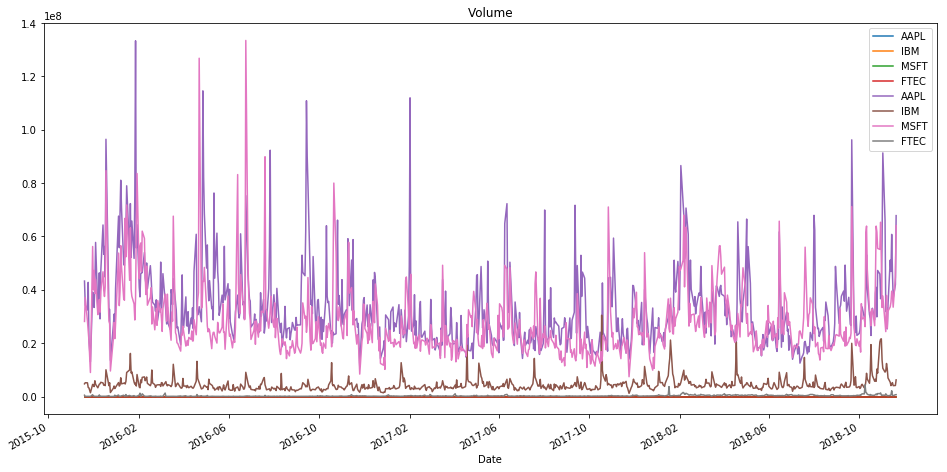

In [1]:
#Graphical Analysis

import pandas_datareader.data as web
import fix_yahoo_finance as yf
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.datetime(2015,11,19)
end = datetime.datetime(2018,11,19)
df_adjclose = web.DataReader(['AAPL', 'IBM','MSFT','FTEC'],'yahoo', start,end)['Adj Close']

df_adjclose['AAPL'].plot(label = 'AAPL', figsize = (16,8), title = 'Adjusted Closing Price')
df_adjclose['IBM'].plot(label = 'IBM')
df_adjclose['MSFT'].plot(label = 'MSFT')
df_adjclose['FTEC'].plot(label = 'FTEC')
plt.legend();

df_volume = web.DataReader(['AAPL', 'IBM','MSFT','FTEC'],'yahoo', start,end)['Volume']
df_volume['AAPL'].plot(label = 'AAPL', figsize = (16,8), title = 'Volume')
df_volume['IBM'].plot(label = 'IBM')
df_volume['MSFT'].plot(label = 'MSFT')
df_volume['FTEC'].plot(label = 'FTEC')
plt.legend();

In [ ]:
#Basic Risk Analysis

In [6]:
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import pandas_datareader.data as web
import fix_yahoo_finance as yf

In [8]:
#Regression Analysis

#First Regression Analysis - Individual Stock's Return on Industry's ETF Return (One time period percent change)
import pandas_datareader.data as web
import fix_yahoo_finance as yf
start = datetime.datetime(2015,11,19)
end = datetime.datetime(2018,11,19)
df = web.DataReader(['AAPL', 'IBM','MSFT','FTEC'],'yahoo', start,end)
df1 = df['Close']
rets = df1.pct_change()

In [11]:
df.iloc[:3]

Attributes        High                                           Low  \
Symbols           AAPL       FTEC         IBM       MSFT        AAPL   
Date                                                                   
2015-11-19  119.750000  33.880001  137.740005  54.660000  116.760002   
2015-11-20  119.919998  33.990002  138.919998  54.299999  118.849998   
2015-11-23  119.730003  34.000000  138.869995  54.459999  117.339996   

Attributes                                          Open             \
Symbols          FTEC         IBM       MSFT        AAPL       FTEC   
Date                                                                  
2015-11-19  33.570000  136.009995  53.779999  117.639999  33.570000   
2015-11-20  33.849998  137.250000  53.270000  119.199997  33.889999   
2015-11-23  33.680000  137.119995  53.750000  119.269997  34.000000   

Attributes    ...           Close                 Volume                       \
Symbols       ...             IBM       MSFT        AAPL      FTEC        IBM   
Date          ...                                                               
2015-11-19    ...      136.740005  53.939999  43295800.0  499700.0  4753600.0   
2015-11-20    ...      138.500000  54.189999  34287100.0   61700.0  5176400.0   
2015-11-23    ...      138.460007  54.189999  32482500.0   85100.0  5137900.0   

Attributes               Adj Close                                    
Symbols           MSFT        AAPL       FTEC         IBM       MSFT  
Date                                                                  
2015-11-19  28149200.0  112.664360  32.583897  120.162025  50.478920  
2015-11-20  37147600.0  113.157593  32.806210  121.708687  50.712875  
2015-11-23  28235900.0  111.687393  32.680550  121.673500  50.712875  

[3 rows x 24 columns]

In [12]:
#Regression Table1
import numpy as np
import statsmodels.api as sm
X = rets[['MSFT','IBM','AAPL']]
X = sm.add_constant(X)
y = rets['FTEC']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                   FTEC   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1440.
Date:                Fri, 30 Nov 2018   Prob (F-statistic):          4.26e-311
Time:                        15:39:40   Log-Likelihood:                 3084.2
No. Observations:                 756   AIC:                            -6160.
Df Residuals:                     752   BIC:                            -6142.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.132e-05      0.000      0.142      0.8

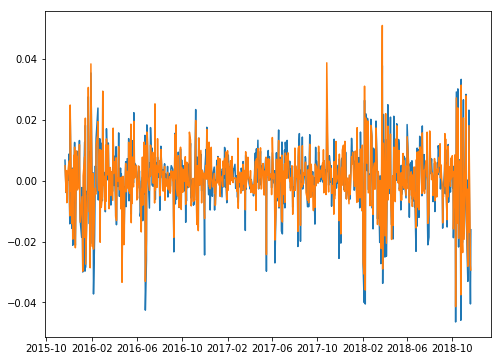

In [14]:
#Fitted Value Graph
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues)   

In [ ]:
#Second Regression Analysis - 



In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM']
all_data = get(tickers, datetime.datetime(2000, 1, 1),datetime.datetime.today())
all_data.head()

In [ ]:
#Percentage Change
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

In [10]:
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2000, 1, 1), 
                          end=datetime.datetime.today())
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2018-11-16    214.612031
2018-11-19    213.757974
2018-11-20    212.647038
2018-11-21    211.575198
2018-11-23    210.278252
2018-11-26    209.019875
2018-11-27    207.714130
2018-11-28    206.525560
2018-11-29    205.232733
2018-11-30    204.017301
Name: Adj Close, dtype: float64

In [ ]:

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2000, 1, 1), 
                          end=datetime.datetime.today())

In [ ]:
# Short moving window rolling mean
aapl['50'] = adj_close_px.rolling(window=50).mean()

# Long moving window rolling mean
aapl['250'] = adj_close_px.rolling(window=250).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '50', '250']].plot()

plt.show()